In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.circuit import ParameterVector
from qiskit.utils import algorithm_globals


from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

np.random.seed(42)
algorithm_globals.random_seed = 42

In [2]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()



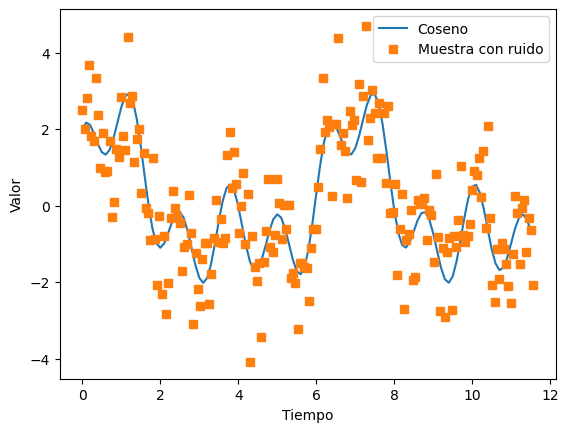

In [4]:
tiempo = np.linspace(0, 4*np.pi-1, num=200)
ruido = np.random.normal(size=200)
coseno = np.cos(tiempo) + np.sin(tiempo) + np.cos(5*tiempo) + np.sin(2*tiempo)
datos = coseno+ruido

muestral = np.arange(0,4*np.pi-1,0.1)
trueCoseno = np.cos(muestral) + np.sin(muestral) + np.cos(5*muestral) + np.sin(2*muestral)


plt.plot(muestral,trueCoseno, label="Coseno")
plt.plot(tiempo,datos,'s', label="Muestra con ruido")
plt.ylabel("Valor")
plt.xlabel("Tiempo")
plt.legend()

plt.show()

In [5]:
aux = np.ones( [tiempo.shape[0],1] )
for i in range(0,tiempo.shape[0]):
    aux[i][0] = tiempo[i]
aux_muestral = np.ones( [muestral.shape[0],1] )
for i in range(0,muestral.shape[0]):
    aux_muestral[i][0] = muestral[i]

In [8]:
# construct simple feature map
param_x = ParameterVector("x",1)
param_y = ParameterVector("pesos", 5)
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_y[4], 0)
feature_map.rx(param_x[0], 0)

# construct simple ansatz

ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y[0], 0)
ansatz.rx(param_x[0], 0)
ansatz.rx(param_y[1], 0)
ansatz.rx(param_x[0], 0)
ansatz.ry(param_y[2], 0)
ansatz.rx(param_x[0], 0)
ansatz.rx(param_y[3], 0)

# construct a circuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, 
    input_params=param_x, 
    weight_params=param_y
)

qc.draw()

┌──────────────┐┌──────────┐┌──────────────┐┌──────────┐┌──────────────┐»
q: ┤ Ry(pesos[4]) ├┤ Rx(x[0]) ├┤ Ry(pesos[0]) ├┤ Rx(x[0]) ├┤ Rx(pesos[1]) ├»
   └──────────────┘└──────────┘└──────────────┘└──────────┘└──────────────┘»
«   ┌──────────┐┌──────────────┐┌──────────┐┌──────────────┐
«q: ┤ Rx(x[0]) ├┤ Ry(pesos[2]) ├┤ Rx(x[0]) ├┤ Rx(pesos[3]) ├
«   └──────────┘└──────────────┘└──────────┘└──────────────┘

In [9]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

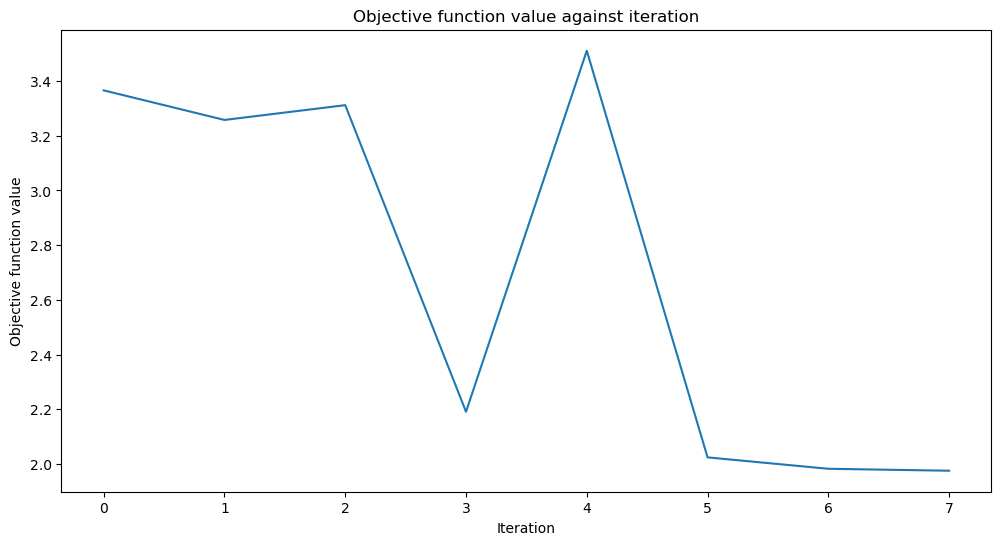

0.3035334635160518

In [10]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(aux, datos)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(aux, datos)



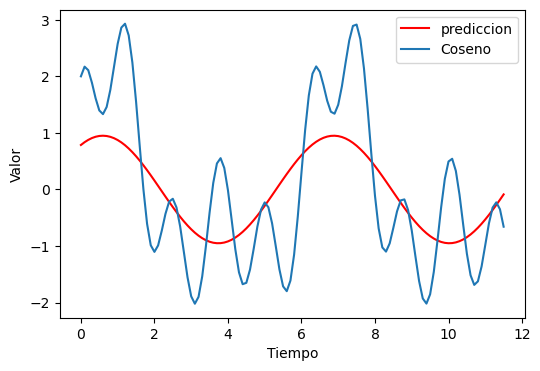

In [11]:
# plot fitted line
y_ = regressor.predict(aux_muestral)

plt.plot(muestral, y_ , label="prediccion", c="r")
plt.plot(muestral,trueCoseno, label="Coseno")
#plt.plot(tiempo,datos,'s', label="Muestra con ruido")
plt.ylabel("Valor")
plt.xlabel("Tiempo")
plt.legend()

plt.show()



In [12]:
print(
    f"Number of trainable weights for SamplerQNN: {regression_estimator_qnn.num_weights} \nWeights: {regressor.weights}"
)

Number of trainable weights for SamplerQNN: 5 
Weights: [ 0.04274153 -1.17404824  0.96278494  1.23778619 -1.25873032]


In [ ]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

qc.draw()

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(aux, datos)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(aux, datos)

In [ ]:
# plot fitted line
y_ = regressor.predict(aux_muestral)

plt.plot(muestral, y_ , label="prediccion", c="r")
plt.plot(muestral,trueCoseno, label="Coseno")
#plt.plot(tiempo,datos,'s', label="Muestra con ruido")
plt.ylabel("Valor")
plt.xlabel("Tiempo")
plt.legend()

plt.show()

In [ ]:
datos = np.array([34980317, 35363890, 35750033, 36127525, 36506811, 36868100, 37194315, 37493072, 37764458, 37987108, 38160263, 38325244, 38467025, 38571941, 38682322, 38764307, 38821377, 38860827,
                    38941622, 39147940, 39356082, 39547353, 39718895, 39884246, 40049974, 40214066, 40369667, 40554387, 40766049, 41423520, 42196231, 42859172, 43662613, 44360521, 45236004, 45983169,
                    46367550, 46562483, 46736257, 46766403, 46593236, 46455123, 46410149, 46449874, 46532869, 46728814, 47105358, 47355685, 47331302, 47615034])

tiempo = np.arange(1973, 1973+datos.size)

In [ ]:
plt.plot(tiempo,datos,"-s")
plt.xlabel("Años")
plt.ylabel("Población")
plt.show()

In [ ]:
def Normalizar(lista):
    media = np.mean(lista)
    dt = lista.std(ddof=0)
    lista = (lista-media)/dt
    return lista

In [ ]:
### Vamos a dar solo unas muestras, quitamos las 10 últimas
aux = np.ones( [tiempo.shape[0] - 10,1] )
for i in range(0,tiempo.shape[0] - 10):
    aux[i][0] = (tiempo[i])

datos_train = np.ones( [datos.shape[0],1] )
for i in range(0, datos.shape[0]):
    datos_train[i] = (datos[i])
    
aux_muestral = np.ones( [tiempo.shape[0],1] )
for i in range(0,tiempo.shape[0]):
    aux_muestral[i][0] = (tiempo[i])

datos_train = Normalizar(datos_train)
aux_muestral[:,0] = Normalizar(aux_muestral[:,0])
aux[:,0] = Normalizar(aux[:,0])
    
plt.plot(aux_muestral[:,0],datos_train,"-s")
plt.xlabel("Años")
plt.ylabel("Población")
plt.show()

In [ ]:
print(aux.shape, tiempo.shape, aux_muestral.shape, datos.shape, datos_train.shape)

In [ ]:


# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = ParameterVector("pesos", 5)
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y[0], 0)
ansatz.x(0)
ansatz.rx(param_y[1], 0)
ansatz.x(0)
ansatz.ry(param_y[2], 0)
ansatz.x(0)
ansatz.rx(param_y[3], 0)
ansatz.x(0)
ansatz.ry(param_y[4], 0)

# construct a circuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

qc.draw()

In [ ]:
# construct the regressor from the neural network
regressor = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=50),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(aux, datos[:datos.shape[0]-10])

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(aux, datos_train[:datos_train.shape[0]-10])

In [ ]:
# plot fitted line
y_ = regressor.predict(aux_muestral)

## Mostrar todo bien otra_Vez

plt.plot(aux_muestral[:,0], y_ , label="prediccion", c="r")
plt.plot(aux_muestral[:,0],datos_train,"-s")
#plt.plot(tiempo,datos,'s', label="Muestra con ruido")
plt.ylabel("Valor")
plt.xlabel("Tiempo")
plt.legend()

plt.show()

In [ ]:
print(
    f"Number of trainable weights for SamplerQNN: {regression_estimator_qnn.num_weights} \nWeights: {regressor.weights}"
)